#Email Spam Classification Project

##🚀 Email Spam Classification: Detecting Spam Emails 🚀

###3.1 Import Necessary Libraries


In [2]:
# Importing necessary libraries
import numpy as np        # For numerical operations
import pandas as pd       # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization
%matplotlib inline

# Importing WordCloud for text visualization
from wordcloud import WordCloud

# Importing NLTK for natural language processing
import nltk
from nltk.corpus import stopwords    # For stopwords


# Downloading NLTK data
nltk.download('stopwords')   # Downloading stopwords data
nltk.download('punkt')       # Downloading tokenizer data


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

###3.2 Load the Data


In [3]:

!pip install opendatasets
import opendatasets as od
#Then you can use it like this:
od.download("https://www.kaggle.com/datasets/alihossary/enron1-spamassasin-raw-dataset/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: gatabhjsbaj
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/alihossary/enron1-spamassasin-raw-dataset


100%|██████████| 8.90M/8.90M [00:00<00:00, 50.6MB/s]

In [4]:
!pip install transformers datasets torch scikit-learn

# Import necessary libraries
import torch
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import load_dataset, Dataset, DatasetDict
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import nltk
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from tqdm import tqdm
from multiprocessing import Pool
from xgboost import XGBClassifier
import os

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [5]:


easy_ham_path = '/content/enron1-spamassasin-raw-dataset/Enron1+spamAssasin/ham/ham'
#hard_ham_path = '/kaggle/input/text-emails-extracted-by-ocr-dataset/OCR exracted text dataset/hard_ham_text/extracted_text_hard_ham'
spam_path = '/content/enron1-spamassasin-raw-dataset/Enron1+spamAssasin/spam/spam'

def get_data(path, label):
    file_contents = [open(os.path.join(path, file), encoding="ISO-8859-1").read() for file in os.listdir(path)]
    labeled_data = [{'text': content, 'label': label} for content in file_contents]
    return labeled_data

ham = get_data(easy_ham_path, 'ham')# + get_data(hard_ham_path, 'ham')
spam = get_data(spam_path, 'spam')

np.random.shuffle(ham)
np.random.shuffle(spam)

data = ham + spam
np.random.shuffle(data)

df = pd.DataFrame(data)
df

,text,label
0,From talentscout4@mindspring.com Thu Aug 2 0...,spam
1,From apache@ns3.super-hosts.com Mon Jul 29 11...,spam
2,"Subject: re : your code # 5 g 6878\nhi again ,...",spam
3,Subject: re : purge of old contract _ event _ ...,ham
4,Subject: re : texas general land office it tra...,ham
...,...,...
6526,From fork-admin@xent.com Wed Sep 18 11:52:31 ...,ham
6527,"Subject: enron / hpl actuals for february 21 ,...",ham
6528,Subject: out of the office\ni will be out of t...,ham
6529,From fork-admin@xent.com Wed Aug 28 10:51:12 ...,ham


In [6]:

# Create a sample DataFrame with 5 rows
sample_df = df.head(5)

# Save the sample DataFrame to a CSV file
sample_df.to_csv('sample_dataset.csv', index=False)

In [7]:
# Assuming your DataFrame is named 'df' and the label column is 'label'
label_counts = df['label'].value_counts()
label_counts

,count
label,
ham,3787
spam,2744


In [8]:
column_counts = df.count()

# Print the counts for each column
column_counts

,0
text,6531
label,6531


In [9]:
df

,text,label
0,From talentscout4@mindspring.com Thu Aug 2 0...,spam
1,From apache@ns3.super-hosts.com Mon Jul 29 11...,spam
2,"Subject: re : your code # 5 g 6878\nhi again ,...",spam
3,Subject: re : purge of old contract _ event _ ...,ham
4,Subject: re : texas general land office it tra...,ham
...,...,...
6526,From fork-admin@xent.com Wed Sep 18 11:52:31 ...,ham
6527,"Subject: enron / hpl actuals for february 21 ,...",ham
6528,Subject: out of the office\ni will be out of t...,ham
6529,From fork-admin@xent.com Wed Aug 28 10:51:12 ...,ham


In [10]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame and 'label' is the column to encode
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

# Now the 'label' column in your DataFrame contains numerical labels
df

,text,label
0,From talentscout4@mindspring.com Thu Aug 2 0...,1
1,From apache@ns3.super-hosts.com Mon Jul 29 11...,1
2,"Subject: re : your code # 5 g 6878\nhi again ,...",1
3,Subject: re : purge of old contract _ event _ ...,0
4,Subject: re : texas general land office it tra...,0
...,...,...
6526,From fork-admin@xent.com Wed Sep 18 11:52:31 ...,0
6527,"Subject: enron / hpl actuals for february 21 ,...",0
6528,Subject: out of the office\ni will be out of t...,0
6529,From fork-admin@xent.com Wed Aug 28 10:51:12 ...,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6531 entries, 0 to 6530
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    6531 non-null   object
 1   label   6531 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 102.2+ KB


label
0    3787
1    2744
Name: count, dtype: int64


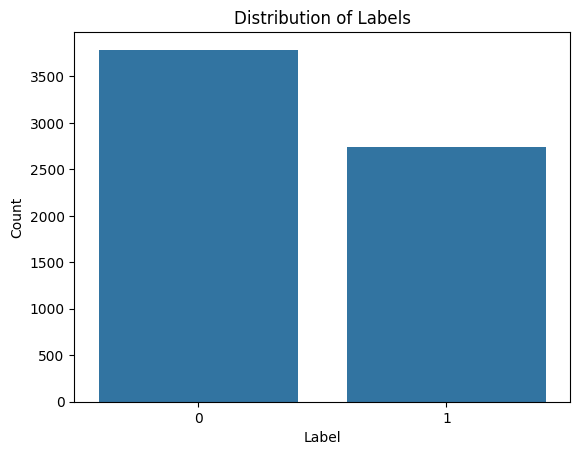

In [12]:
# 2. Distribution of labels (Class balance check)
label_counts = df['label'].value_counts()
print(label_counts)
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title("Distribution of Labels")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

count      6531.000000
mean       3135.540805
std        7585.778728
min          10.000000
25%         358.000000
50%        1062.000000
75%        3186.000000
max      300734.000000
Name: text_length, dtype: float64


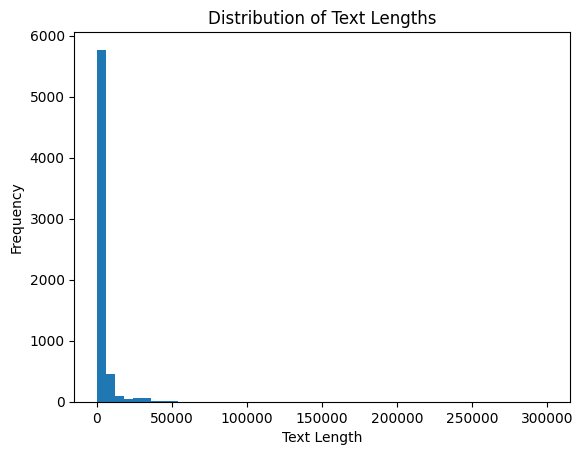

In [13]:
# 3. Basic text length analysis
df['text_length'] = df['text'].apply(len)
print(df['text_length'].describe())

# Plot histogram of text lengths
plt.hist(df['text_length'], bins=50)
plt.title("Distribution of Text Lengths")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.show()

In [14]:
# 4. Basic text exploration (e.g., most common words)
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english', max_features=20)
X = vectorizer.fit_transform(df['text'])
word_counts = X.sum(axis=0).A1
words = vectorizer.get_feature_names_out()

word_freq = dict(zip(words, word_counts))
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

print("Most common words:")
for word, freq in sorted_word_freq:
    print(f"{word}: {freq}")

Most common words:
com: 62333
3d: 43613
font: 42980
td: 38004
http: 34766
width: 25658
br: 23523
tr: 20526
www: 18662
size: 17825
2002: 15861
height: 14097
ect: 13314
nbsp: 13237
face: 12499
href: 12072
src: 11990
img: 11798
subject: 11679
net: 11623


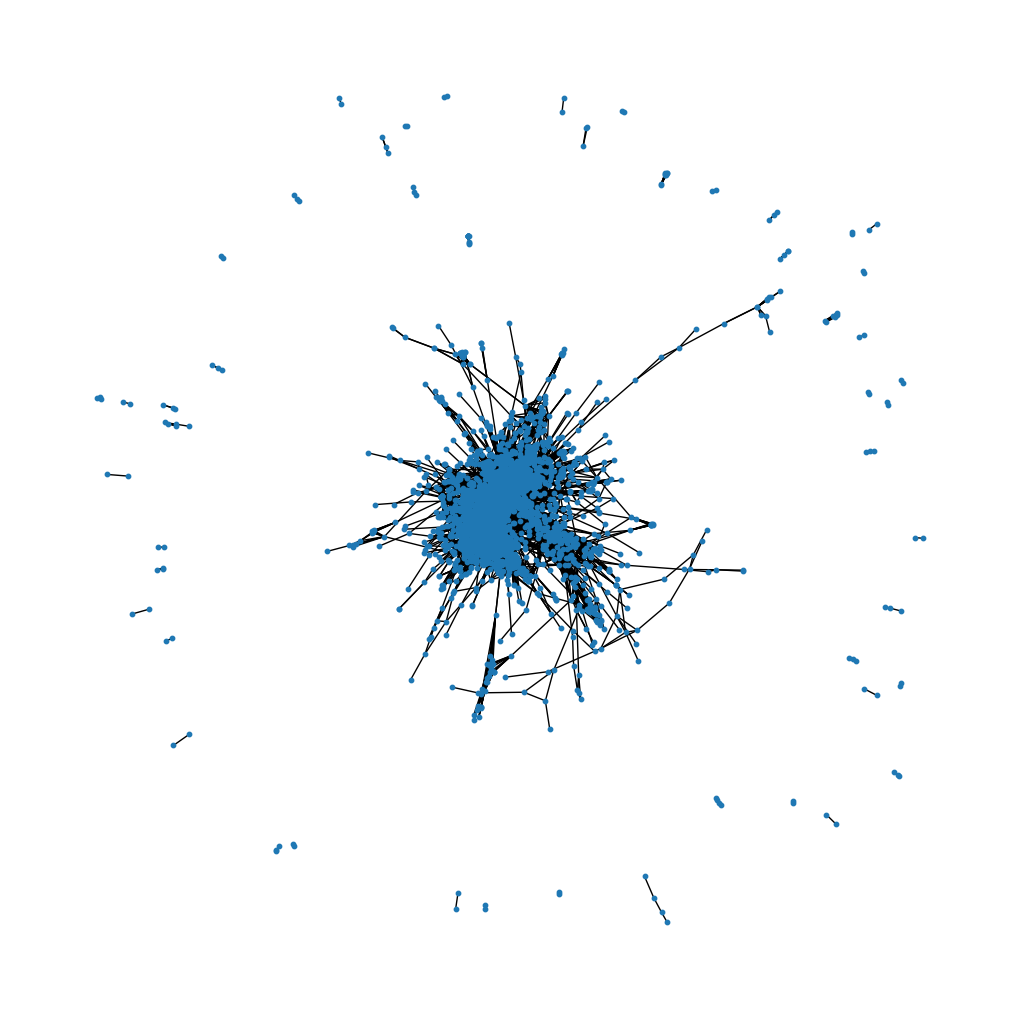

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and the text column is 'text'
corpus = df['text'].tolist()

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the corpus
tfidf_matrix = vectorizer.fit_transform(corpus)

# Calculate cosine similarity between documents
similarity_matrix = cosine_similarity(tfidf_matrix)

# Create a graph from the similarity matrix
graph = nx.Graph()
for i in range(len(corpus)):
    for j in range(i + 1, len(corpus)):
        if similarity_matrix[i][j] > 0.2:  # Set a threshold for similarity
            graph.add_edge(i, j, weight=similarity_matrix[i][j])

# Visualize the graph
plt.figure(figsize=(10, 10))
nx.draw(graph, with_labels=False, node_size=10)
plt.show()

#Modeling

In [16]:
# Split the dataset into training and testing sets
train_dataset, test_dataset = train_test_split(df, test_size=0.2)
train_dataset = Dataset.from_dict(train_dataset)
test_dataset = Dataset.from_dict(test_dataset)

In [17]:
train_dataset

Dataset({
    features: ['text', 'label', 'text_length'],
    num_rows: 5224
})

In [18]:
test_dataset

Dataset({
    features: ['text', 'label', 'text_length'],
    num_rows: 1307
})

In [19]:
# 2. Tokenization
# Load BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the text data
def tokenize_function(examples):
    return tokenizer(examples['text'], padding='max_length', truncation=True)

train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Map:   0%|          | 0/5224 [00:00<?, ? examples/s]

Map:   0%|          | 0/1307 [00:00<?, ? examples/s]

In [20]:
# 3. Model Setup
# Load the pre-trained BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# 4. Training Arguments
training_args = TrainingArguments(
    output_dir='./results',          # Output directory
    evaluation_strategy="epoch",     # Evaluation after each epoch
    learning_rate=2e-5,              # Learning rate
    per_device_train_batch_size=8,   # Batch size for training
    per_device_eval_batch_size=8,    # Batch size for evaluation
    num_train_epochs=3,              # Number of epochs
    weight_decay=0.01,               # Strength of weight decay
)

# 5. Trainer Setup
trainer = Trainer(
    model=model,                         # The model to train
    args=training_args,                  # Training arguments
    train_dataset=train_dataset,         # Training dataset
    eval_dataset=test_dataset,           # Evaluation dataset
    tokenizer=tokenizer,                 # Tokenizer
)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [21]:
# 6. Training the Model
trainer.train()

# 7. Model Evaluation
# Evaluate the model on the test dataset
predictions, labels, _ = trainer.predict(test_dataset)
predicted_labels = torch.argmax(torch.tensor(predictions), axis=1)

# Classification Report
print(classification_report(labels, predicted_labels))

# 8. Saving the model
model.save_pretrained("./phishing_model")
tokenizer.save_pretrained("./phishing_model")


wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss
1,0.156600,0.079370
2,0.035100,0.098104
3,0.015500,0.053558


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       768
           1       0.99      0.98      0.99       539

    accuracy                           0.99      1307
   macro avg       0.99      0.99      0.99      1307
weighted avg       0.99      0.99      0.99      1307



('./phishing_model/tokenizer_config.json',
 './phishing_model/special_tokens_map.json',
 './phishing_model/vocab.txt',
 './phishing_model/added_tokens.json')

#Evaluate Model

In [22]:
import torch

def predict(text):
    # Ensure model and inputs are on the same device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)  # Move the model to the device

    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512).to(device) # Move inputs to the device
    outputs = model(**inputs)
    prediction = torch.argmax(outputs.logits, dim=1)
    return "Spam" if prediction.item() == 1 else "Ham"

# Test prediction
print(predict("Subject: buy viagra now, special offer!"))

Spam


In [23]:
print(predict("""Subject: Congratulations! You've won a $1000 Amazon gift card!

Dear winner,

We are pleased to inform you that you have won a $1000 Amazon gift card in our latest promotion. To claim your prize, simply click on the link below and provide your personal details, including your credit card number for verification.

[Click Here to Claim Your Gift Card]

Please act fast as this offer expires in 24 hours!

Best regards,
The Amazon Promotion Team

P.S. Failure to act immediately may result in losing this amazing offer.
"""))

Spam


In [24]:
print(predict("""Subject: You've won a $5000 Cash Prize!

Dear [Name],

Congratulations! You've been selected to receive a $5000 cash prize in our latest lottery. To claim your prize, simply click on the link below to verify your identity and provide us with your bank account details.

[Claim Your Prize Now]

This is a limited-time offer, so hurry up and grab your reward today!

Best regards,
The Prize Claims Team
"""))

Spam


In [25]:
print(predict(""" Subject: Meeting Agenda for Tomorrow

Hi Team,

Just a quick reminder about our meeting tomorrow at 10 AM to discuss the progress on the new website redesign. I'll be going over the latest feedback and updates.

Please ensure you have the latest draft of your designs ready for review.

Best,
John
Project Manager
"""))

Ham


In [26]:
model.save_pretrained("/content/phishing_model")
tokenizer.save_pretrained("/content/phishing_model")

('/content/phishing_model/tokenizer_config.json',
 '/content/phishing_model/special_tokens_map.json',
 '/content/phishing_model/vocab.txt',
 '/content/phishing_model/added_tokens.json')

In [27]:
import shutil

# Zip the model folder
shutil.make_archive('/content/phishing_model', 'zip', '/content', 'phishing_model')


'/content/phishing_model.zip'

In [28]:
from google.colab import files
files.download('/content/phishing_model.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [29]:
#  file of this notebook and save content

!pip freeze > requirements.txt